In [49]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

EMISSIONS_PATH = os.path.join("datasets", "emissions")
#EMISSIONS_URL = DOWNLOAD_ROOT + "datasets/emissions/emissions.tgz"

def load_emissions_data(emissions_path=EMISSIONS_PATH):
 csv_path = os.path.join(emissions_path, "emissions.csv")
 return pd.read_csv(csv_path)

emissions = load_emissions_data()
emissions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15799 entries, 0 to 15798
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   blkgrp                       15799 non-null  object 
 1   cbsa                         14608 non-null  object 
 2   blkgrps                      15799 non-null  int64  
 3   population                   15799 non-null  int64  
 4   households                   15799 non-null  int64  
 5   land_acres                   15799 non-null  float64
 6   ht_ami                       15378 non-null  float64
 7   ht_80ami                     15378 non-null  float64
 8   ht_nmi                       15379 non-null  float64
 9   h_ami                        15378 non-null  float64
 10  h_80ami                      15378 non-null  float64
 11  h_nmi                        15379 non-null  float64
 12  t_ami                        15725 non-null  float64
 13  t_80ami         

In [50]:
import numpy as np
def split_train_test(data, test_ratio):
 np.random.seed(42)
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(emissions, 0.2)
print("train_set = ")
len(train_set)
print("test_set = ")
len(test_set)

train_set = 
test_set = 


3159

<AxesSubplot:xlabel='population', ylabel='land_acres'>

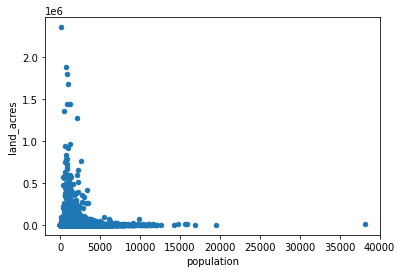

In [51]:
# id = col labeled blkgrp
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(emissions, test_size=0.2, random_state=42)

# kinda skipped the sampling bias part and am going with just random splitting of train/test
# this means no stratified shuffle split
# plot of pop vs land for integrity of data
emissions = train_set.copy()
emissions.plot(kind="scatter", x="population", y="land_acres")


In [52]:
# add carbon emissions column + prints corr_matrix --> hardcoded number of people per household, in U.S.
emissions["emissions_per_capita"] = emissions["co2_per_hh_local"] / 2.53
emissions.describe()
#corr_matrix = emissions.corr()
#corr_matrix["emissions_per_capita"].sort_values(ascending=False)

,blkgrps,population,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,h_80ami,h_nmi,...,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu,emissions_per_capita
count,12639.0,12639.000000,12639.000000,1.263900e+04,12298.000000,12298.000000,12298.000000,12298.000000,12298.000000,12298.000000,...,12582.000000,12582.000000,12612.000000,12639.000000,12298.000000,10505.000000,10178.000000,12582.000000,12582.000000,12237.000000
mean,1.0,1682.738191,578.630983,1.014187e+04,52.305985,61.871524,50.451049,27.101805,33.878679,26.726134,...,87.783103,56.499762,150.616318,1402.267347,1200.171491,1389.060447,930.933287,63.042442,36.960658,3.623759
std,0.0,1214.913694,381.736329,6.167096e+04,13.613454,16.636842,13.118495,10.989133,13.750554,12.025858,...,4.303939,129.931010,120.829353,1183.212290,540.132680,592.879017,373.257524,26.344280,26.343909,0.726075
min,1.0,0.000000,0.000000,1.278000e+01,21.000000,25.000000,22.000000,4.000000,5.000000,5.000000,...,72.000000,1.000000,1.000000,271.000000,216.000000,456.000000,99.000000,0.000000,0.000000,0.462451
25%,1.0,967.000000,346.000000,1.546850e+02,43.000000,50.000000,42.000000,20.000000,25.000000,19.000000,...,85.000000,7.000000,51.000000,740.000000,855.250000,1003.000000,692.000000,47.000000,16.000000,3.158103
50%,1.0,1394.000000,491.000000,3.132300e+02,50.000000,59.000000,48.000000,25.000000,31.000000,24.000000,...,89.000000,12.000000,140.000000,976.000000,1074.000000,1241.000000,850.000000,69.000000,31.000000,3.727273
75%,1.0,2040.000000,706.000000,1.422980e+03,60.000000,71.000000,56.000000,31.000000,39.000000,31.000000,...,91.000000,32.000000,215.000000,1466.500000,1385.000000,1583.000000,1087.000000,84.000000,53.000000,4.173913
max,1.0,38137.000000,11564.000000,2.352522e+06,184.000000,227.000000,119.000000,141.000000,177.000000,89.000000,...,98.000000,2449.000000,1395.000000,12469.000000,4001.000000,4001.000000,3501.000000,100.000000,100.000000,5.458498


In [53]:
# remove unnecessary, make sure train and test sets are cleaned
emissions = emissions.drop("co2_per_hh_local", axis=1)
emissions = emissions.drop("blkgrps", axis=1)
emissions = emissions.drop("ht_nmi", axis=1)
emissions = emissions.drop("ht_80ami", axis=1)
emissions = emissions.drop("h_nmi", axis=1)
emissions = emissions.drop("t_80ami", axis=1)
emissions = emissions.drop("t_nmi", axis=1)
emissions = emissions.drop("autos_per_hh_80ami", axis=1)
emissions = emissions.drop("autos_per_hh_nmi", axis=1)
emissions = emissions.drop("vmt_per_hh_80ami", axis=1)
emissions = emissions.drop("vmt_per_hh_nmi", axis=1)
emissions = emissions.drop("pct_transit_commuters_80ami", axis=1)
emissions = emissions.drop("pct_transit_commuters_nmi", axis=1)
emissions = emissions.drop("t_cost_80ami", axis=1)
emissions = emissions.drop("t_cost_nmi", axis=1)
emissions = emissions.drop("auto_ownership_cost_80ami", axis=1)
emissions = emissions.drop("auto_ownership_cost_nmi", axis=1)
emissions = emissions.drop("vmt_cost_80ami", axis=1)
emissions = emissions.drop("vmt_cost_nmi", axis=1)
emissions = emissions.drop("transit_cost_80ami", axis=1)
emissions = emissions.drop("transit_cost_nmi", axis=1)
emissions = emissions.drop("transit_trips_80ami", axis=1)
emissions = emissions.drop("transit_trips_nmi", axis=1)
emissions = emissions.drop("pct_renter_occupied_hu", axis=1)
emissions = emissions.drop("pct_owner_occupied_hu", axis=1)
emissions = emissions.drop("median_gross_rent", axis=1)
emissions = emissions.drop("median_smoc", axis=1)

# emissions.describe()
corr_matrix = emissions.corr()
corr_matrix["emissions_per_capita"].sort_values(ascending=False)

emissions_per_capita          1.000000
vmt_per_hh_ami                0.881504
vmt_cost_ami                  0.880749
t_cost_ami                    0.830398
autos_per_hh_ami              0.815963
auto_ownership_cost_ami       0.793934
frac_sfd                      0.661878
t_ami                         0.550888
ht_ami                        0.518815
avg_block_perimeter_meters    0.393853
h_80ami                       0.354101
h_ami                         0.353903
block_size                    0.291212
h_cost                        0.272940
population                    0.244367
land_acres                    0.115806
households                    0.081876
res_density                  -0.322370
co2_per_acre_local           -0.410728
emp_ndx                      -0.511145
emp_ovrll_ndx                -0.531130
gross_hh_density             -0.549033
intersection_density         -0.560573
hh_gravity                   -0.580729
emp_gravity                  -0.609086
transit_cost_ami         

In [54]:
# remove string vals
emissions = emissions.drop("blkgrp", axis=1)
emissions = emissions.drop("cbsa", axis=1)

In [55]:
# imputer replaces missing vals with median

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Drop non-numerical statistic bc imputer requires numbers
#emissions_num.describe()


#emissions_num = emissions.drop("pop", axis=1)
#emissions_num = emissions.drop("cbsa", axis=1)
#emissions_num["pop"].value_counts()
#corr_matrix = emissions_num.corr()
#corr_matrix["emissions_per_capita"].sort_values(ascending=False)

#imputer.fit(emissions)
#imputer.statistics_
#print(emissions.median().values)

# transform training set by replacing missing vals
#X = imputer.transform(emissions)
#emissions_tr = pd.DataFrame(X, columns=emissions.columns)

#emissions["t_cost_ami"] = emissions["t_cost_ami"].fillna(method='ffill')
#emissions["vmt_cost_ami"] = emissions["vmt_cost_ami"].fillna(method='ffill')
#emissions["autos_per_hh_ami"] = emissions["autos_per_hh_ami"].fillna(method='ffill')
#emissions["auto_ownership_cost_ami"] = emissions["auto_ownership_cost_ami"].fillna(method='ffill')
#emissions["frac_sfd"] = emissions["frac_sfd"].fillna(method='ffill')
#emissions["t_ami"] = emissions["t_ami"].fillna(method='ffill')
#emissions["ht_ami"] = emissions["ht_ami"].fillna(method='ffill')
#emissions["avg_block_perimeter_meters"] = emissions["avg_block_perimeter_meters"].fillna(method='ffill')
#emissions["h_ami"] = emissions["h_ami"].fillna(method='ffill')
#emissions["h_80ami"] = emissions["h_80ami"].fillna(method='ffill')
#emissions["block_size"] = emissions["block_size"].fillna(method='ffill')
#emissions["h_cost"] = emissions["h_cost"].fillna(method='ffill')
#emissions["population"] = emissions["population"].fillna(method='ffill')
#emissions["land_acres"] = emissions["land_acres"].fillna(method='ffill')
#emissions["households"] = emissions["households"].fillna(method='ffill')
#emissions["res_density"] = emissions["res_density"].fillna(method='ffill')
#emissions["co2_per_acre_local"] = emissions["co2_per_acre_local"].fillna(method='ffill')
#emissions["emp_ndx"] = emissions["emp_ndx"].fillna(method='ffill')
#emissions["emp_ovrll_ndx"] = emissions["emp_ovrll_ndx"].fillna(method='ffill')
#emissions["gross_hh_density"] = emissions["gross_hh_density"].fillna(method='ffill')
#emissions["intersection_density"] = emissions["intersection_density"].fillna(method='ffill')
#emissions["hh_gravity"] = emissions["hh_gravity"].fillna(method='ffill')
#emissions["emp_gravity"] = emissions["emp_gravity"].fillna(method='ffill')
#emissions["transit_cost_ami"] = emissions["transit_cost_ami"].fillna(method='ffill')
#emissions["transit_trips_ami"] = emissions["transit_trips_ami"].fillna(method='ffill')
#emissions["pct_transit_commuters_ami"] = emissions["pct_transit_commuters_ami"].fillna(method='ffill')
#emissions["compact_ndx"] = emissions["compact_ndx"].fillna(method='ffill')
#emissions["vmt_per_hh_ami"] = emissions["vmt_per_hh_ami"].fillna(method='ffill')

emissions = emissions.replace(np.NaN, emissions.mean())
print(emissions)





       population  households  land_acres  ht_ami  h_ami  h_80ami  t_ami  \
3651          709         318       69.04    44.0   23.0     29.0   21.0   
5149          452         248      181.90    43.0   20.0     25.0   23.0   
2133         2870         781      199.86    40.0   21.0     27.0   19.0   
10694        2550         770      185.21    47.0   23.0     29.0   23.0   
13001        1092         438    13906.52    66.0   31.0     39.0   35.0   
...           ...         ...         ...     ...    ...      ...    ...   
13418        3373        1012     3255.96    84.0   44.0     55.0   40.0   
5390         1138         305      230.31    37.0   16.0     20.0   21.0   
860          2442        1161      172.91    44.0   26.0     33.0   17.0   
15795        1445         332     4744.36   105.0   50.0     62.0   55.0   
7270         1037         317      110.66    44.0   20.0     25.0   25.0   

       co2_per_acre_local  autos_per_hh_ami  vmt_per_hh_ami  ...  \
3651               

In [56]:
train_set, test_set = train_test_split(emissions, test_size=0.2, random_state=42)
emissions_labels = train_set["emissions_per_capita"].copy()
emissions = train_set.drop("emissions_per_capita", axis=1)

In [57]:
# split final cleaned data from test set and model


#emissions["pop"].value_counts()


from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(emissions, emissions_labels)

emissions_predictions = tree_reg.predict(emissions)
tree_mse = mean_squared_error(emissions_labels, emissions_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
print(emissions_predictions)


[3.77470356 4.58498024 2.59288538 ... 3.7944664  4.01581028 3.73517787]


In [58]:
# Cross validation model --> compare to following lin reg model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, emissions, emissions_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [59]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [0.37708806 0.37991489 0.39118388 0.37591096 0.39153227 0.38817331
 0.39109178 0.37890676 0.38531134 0.36167037]
Mean: 0.3820783615971475
Standard deviation: 0.008917932281648396


In [60]:
# just testing another algorithm
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(emissions, emissions_labels)

lin_scores = cross_val_score(lin_reg, emissions, emissions_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [0.30632246 0.29111566 0.29036403 0.28637213 0.31916167 0.30687434
 0.3206867  0.30656578 0.30665345 0.30033762]
Mean: 0.3034453865706249
Standard deviation: 0.010993755523463244


In [61]:
# Fixing training and testing set for proper testing
#train_set, test_set = train_test_split(emissions, test_size=0.2, random_state=42)
#train_set_labels = train_set["emissions_per_capita"].copy()
#train_set = train_set.drop("emissions_per_capita", axis=1)

#test_set_labels = test_set["emissions_per_capita"].copy()
#test_set = test_set.drop("emissions_per_capita", axis=1)


In [63]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(emissions, emissions_labels)
emissions_predictions = forest_reg.predict(emissions)
forest_mse = mean_squared_error(emissions_labels, emissions_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.09907390834100638

In [64]:
# display randomForestScores
scores = cross_val_score(tree_reg, emissions, emissions_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.37699118 0.3864477  0.39759793 0.37544935 0.38522541 0.3868061
 0.39564132 0.37897809 0.38366932 0.36229748]
Mean: 0.3829103890044617
Standard deviation: 0.009708161088019314


In [ ]:
# save model
import joblib
joblib.dump(emissions, "emissions.pkl")
# later